# 1.figure语法及操作

In [1]:
# (1)figure语法说明

# figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)

# num:图像编号或名称，数字为编号 ，字符串为名称
# figsize:指定figure的宽和高，单位为英寸；
# dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
# facecolor:背景颜色
# edgecolor:边框颜色
# frameon:是否显示边框

# matplotlib下, 一个 Figure 对象可以包含多个子图(Axes), 可以使用 subplot() 快速绘制, 其调用形式如下 :

# subplot(numRows, numCols, plotNum)

# 图表的整个绘图区域被分成 numRows 行和 numCols 列然后按照从左到右，从上到下的顺序对每个子区域进行编号，左上的子区域的编号为1

# plotNum 参数指定创建的 Axes 对象所在的区域

# 如果 numRows ＝ 2, numCols ＝ 3, 那整个绘制图表样式为 2X3 的图片区域, 用坐标表示为

# (1, 1), (1, 2), (1, 3)
# (2, 1), (2, 2), (2, 3)

# 这时, 当 plotNum ＝ 3 时, 表示的坐标为(1, 3), 即第一行第三列的子图

# 如果 numRows, numCols 和 plotNum 这三个数都小于 10 的话, 可以把它们缩写为一个整数, 例如 subplot(323) 和 subplot(3,2,3) 是相同的.

# subplot在 plotNum 指定的区域中创建一个轴对象. 如果新创建的轴和之前创建的轴重叠的话，之前的轴将被删除.


# 2.subplot创建单个子图

/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


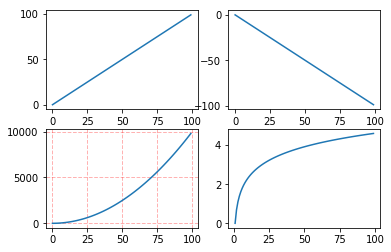

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 100) 
#圖一
plt.subplot(221)
plt.plot(x, x)
#圖二
plt.subplot(222)
plt.plot(x, -x)
#圖三
plt.subplot(223)
plt.plot(x, x ** 2)
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
#圖四
plt.subplot(224)
plt.plot(x, np.log(x))
plt.show()

# 3.subplots创建多个子图

/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


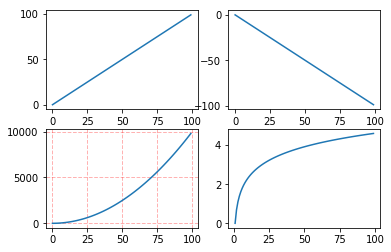

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.arange(0, 100)
#划分子图
fig,axes=plt.subplots(2,2)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]
#作图1
ax1.plot(x, x)
#作图2
ax2.plot(x, -x)
#作图3
ax3.plot(x, x ** 2)
ax3.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
#作图4
ax4.plot(x, np.log(x))
plt.show()

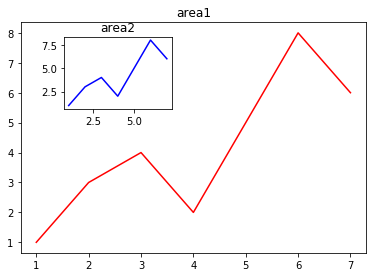

In [22]:
#新建figure
fig = plt.figure()
# 定义数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]
#新建区域ax1
#figure的百分比,从figure 10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# 获得绘制的句柄
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(x, y, 'r')
ax1.set_title('area1')

#新增区域ax2,嵌套在ax1内
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,y, 'b')
ax2.set_title('area2')
plt.show()

![title](1.png)

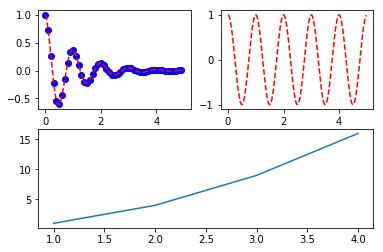

In [24]:
import matplotlib.pyplot as plt
import numpy as np



def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

if __name__ == '__main__' :
    t1 = np.arange(0, 5, 0.1)
    t2 = np.arange(0, 5, 0.02)

    plt.figure(12)
    plt.subplot(221)
    plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')

    plt.subplot(222)
    plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')

    plt.subplot(212)
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

    plt.show()


In [25]:
#![title](img/picture.png)

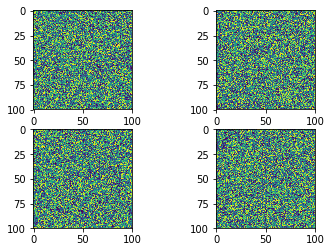

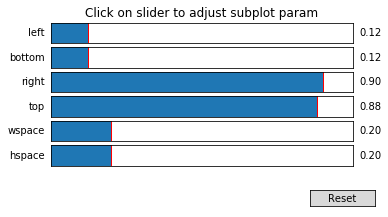

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(np.random.random((100, 100)))

axs[0, 1].imshow(np.random.random((100, 100)))

axs[1, 0].imshow(np.random.random((100, 100)))

axs[1, 1].imshow(np.random.random((100, 100)))

plt.subplot_tool()
plt.show()

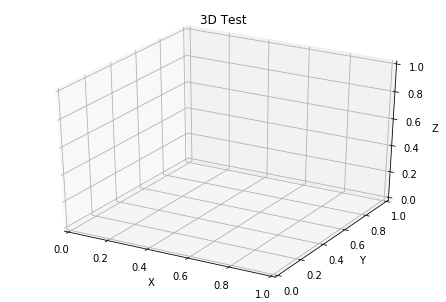

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()